# Anaysis of the expenses of a Building construction 
This is an analysis of the expenses incurred during the construction of a water tank tower that will hold 4 tanks each containing 24000 Litres of clean drinking water.

A proper accountability of the construction cost is important to estimate the ROI of the water business whose customers are mainly water bowsers distributing clean water in the surrounding community.

#### Import the libraries required for analysis and visualization

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

#### Read in the excel sheet data. 
There is only 1 sheet in the workbook so sheet_name is not included

In [27]:
expenses = pd.read_excel('tower expenses 10th Nov.xlsx')
expenses.head()

,Expense Date,Description,Employee,Unit Price,Quantity,Total
0,2020-11-10,Bucket,Materials,230,5,1150
1,2020-11-10,4way,Materials,30,3,90
2,2020-11-10,Couples,Materials,8,10,80
3,2020-11-10,Conduit 20mm,Materials,110,5,550
4,2020-11-07,Supervisor,Labor,2000,6,12000


#### Rename the columns

In [28]:
expenses = expenses.rename(columns = {'Expense Date': 'Date', 'Description':'Name', 'Employee':'Category'})
expenses.head()

,Date,Name,Category,Unit Price,Quantity,Total
0,2020-11-10,Bucket,Materials,230,5,1150
1,2020-11-10,4way,Materials,30,3,90
2,2020-11-10,Couples,Materials,8,10,80
3,2020-11-10,Conduit 20mm,Materials,110,5,550
4,2020-11-07,Supervisor,Labor,2000,6,12000


#### Investigate the data for null values

In [29]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        109 non-null    datetime64[ns]
 1   Name        109 non-null    object        
 2   Category    109 non-null    object        
 3   Unit Price  109 non-null    int64         
 4   Quantity    109 non-null    int64         
 5   Total       109 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 5.2+ KB


#### Sort the dataframe by the oldest date to the newest
Currently the data is sorted from the newest to oldest expense entry

USe sort_values. Once sorted, reset_index creates a new index from 0. However, the old index is maintained in a new additional column 'index'. Drop this column 'index' which represents the old index entries.

In [30]:
expenses = expenses.sort_values('Date', ascending = True).reset_index()

In [31]:
expenses.head(3)

,index,Date,Name,Category,Unit Price,Quantity,Total
0,108,2020-09-28,Ladder Construction,Ladder,15000,1,15000
1,107,2020-09-28,Sand 18 Tonnes,Materials,25000,2,50000
2,106,2020-09-28,Ballast 17 Tonnes,Materials,30000,3,90000


In [32]:
expenses = expenses.drop('index', axis = 1)

In [33]:
expenses.head(3)

,Date,Name,Category,Unit Price,Quantity,Total
0,2020-09-28,Ladder Construction,Ladder,15000,1,15000
1,2020-09-28,Sand 18 Tonnes,Materials,25000,2,50000
2,2020-09-28,Ballast 17 Tonnes,Materials,30000,3,90000


In [34]:
expenses.tail(3)

,Date,Name,Category,Unit Price,Quantity,Total
106,2020-11-10,Couples,Materials,8,10,80
107,2020-11-10,4way,Materials,30,3,90
108,2020-11-10,Bucket,Materials,230,5,1150


### Visualization

#### separate the dataset by weeks

Create a new column 'week' representing the week, with first week as week1 etc

In [35]:
expenses['Week'] = (expenses['Date'] - expenses['Date'][0]).dt.days//7+1
expenses['Week'] = 'week' + expenses['Week'].astype(str)
expenses.head()

,Date,Name,Category,Unit Price,Quantity,Total,Week
0,2020-09-28,Ladder Construction,Ladder,15000,1,15000,week1
1,2020-09-28,Sand 18 Tonnes,Materials,25000,2,50000,week1
2,2020-09-28,Ballast 17 Tonnes,Materials,30000,3,90000,week1
3,2020-09-29,Poles 30 pcs,Materials,4000,1,4000,week1
4,2020-09-29,"Timber 1"" 3500 2"" 300",Materials,35000,1,35000,week1


In [36]:
weekly_expenses = expenses.groupby('Week')['Total'].sum().reset_index()
weekly_expenses

,Week,Total
0,week1,701449
1,week2,172650
2,week3,96500
3,week4,107305
4,week5,64100
5,week6,164860
6,week7,1870


In [185]:
# g = sns.barplot(x=weekly_expenses['Week'], y=weekly_expenses['Total'])
# #sns.barplot(x='sex',y='survived',data=groupedvalues)

# for index, row in weekly_expenses.iterrows():
#     g.text(row.name,row.Total, round(row.Total), color='black', ha="center")

##### Bar graph of total expenses by week

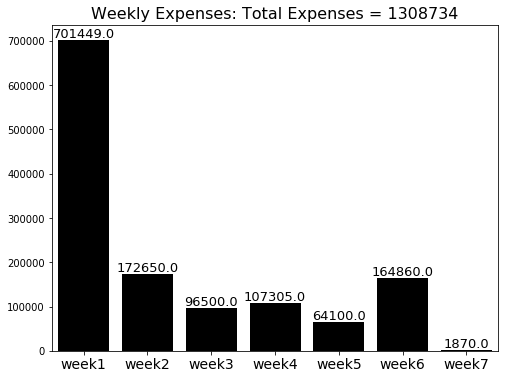

In [37]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="Week",y="Total",data=weekly_expenses,color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 6), 
                   textcoords = 'offset points')
#xytext(0,-12) #if you want the text inside the bar
plt.xticks(size=14)
plt.xlabel('')
plt.ylabel('')
plt.title('Weekly Expenses'+': Total Expenses = '+str(weekly_expenses['Total'].sum()), size=16)
plt.show()

#### Group expenses by date

In [38]:
daily_expenses = expenses.groupby('Date')['Total'].sum().reset_index()
daily_expenses.head()

,Date,Total
0,2020-09-28,155000
1,2020-09-29,43600
2,2020-10-02,474809
3,2020-10-03,28040
4,2020-10-05,5750


##### Line plot of total expenses by day
The vertical lines show the day when a floor slab was filled with concrete aka 'koroga'. These days represent an additional labor expense as there are alot of workers on site. There are however no other likely expenses on the day, as the materials for this labor intensive activity are bought days prior.

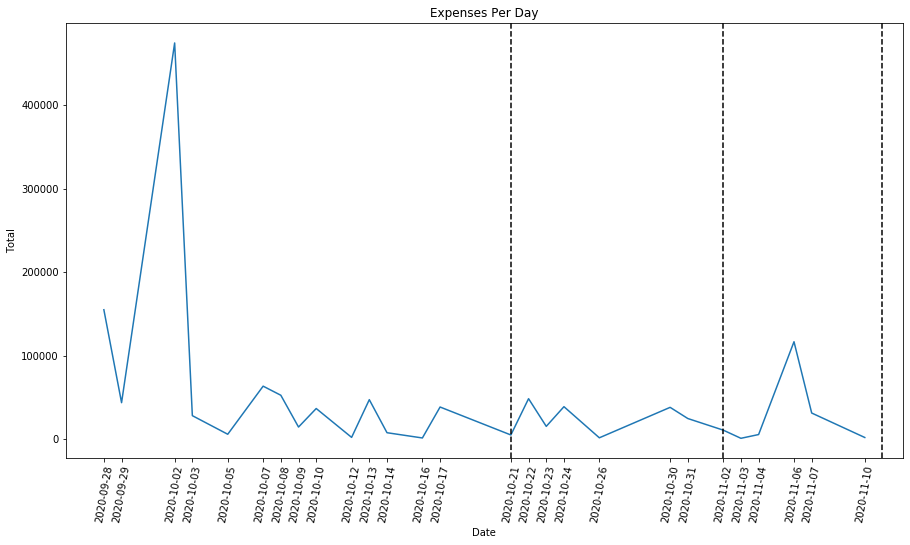

In [49]:
#Red vertical line is the koroga date
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='Date',y='Total', data=daily_expenses)
ax.set(xticks = daily_expenses.Date.values)
plt.xticks(rotation=80)
plt.title('Expenses Per Day')

plt.axvline(pd.Timestamp('2020-10-21'), color="k", linestyle="--") #koroga dates
plt.axvline(pd.Timestamp('2020-11-02'), color="k", linestyle="--")
plt.axvline(pd.Timestamp('2020-11-11'), color="k", linestyle="--")
plt.show()

#### Expenses by Category

In [50]:
cat_expenses = expenses.groupby('Category')['Total'].sum().reset_index() #Prevents the category from being the index
cat_expenses

,Category,Total
0,Approvals,41500
1,Fuel,10140
2,Hire,4200
3,Labor,214900
4,Ladder,15000
5,Materials,957995
6,Tools,64999


##### A bar plot of expenses by category name

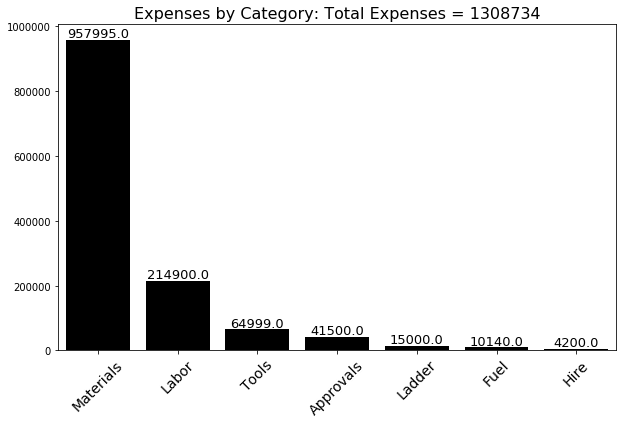

In [15]:
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="Category",y="Total",data=cat_expenses, order=cat_expenses.sort_values('Total', ascending=False).Category, color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 6), 
                   textcoords = 'offset points')
#xytext(0,-12) #if you want the text inside the bar
plt.xticks(rotation=45,size=14)
plt.xlabel("")
plt.ylabel("")
plt.title('Expenses by Category'+': Total Expenses = '+str(cat_expenses['Total'].sum()), size=16)
plt.show()

### Total expenses

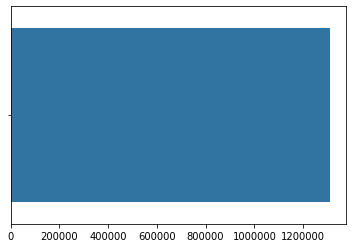

In [14]:
sns.barplot(expenses['Total'].sum())

### Analysis by each category

#### Labor expenses

In [52]:
labor_expenses = expenses[expenses['Category'] == 'Labor']
labor_expenses.head(3)

,Date,Name,Category,Unit Price,Quantity,Total,Week
25,2020-10-03,Unskilled,Labor,600,15,9000,week1
26,2020-10-03,Supervisor,Labor,2000,4,8000,week1
28,2020-10-03,Skilled,Labor,1200,7,8400,week1


In [53]:
labor_grps = labor_expenses.groupby('Name')['Total'].sum().reset_index()
labor_grps.head(5)

,Name,Total
0,Electrician,1000
1,Plumber,2000
2,Skilled,60000
3,Supervisor,68000
4,Unskilled,78600


In [19]:
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    size=13,
#                    xytext = (0, 6), 
#                    textcoords = 'offset points')

In [20]:
# str(labor_grps['Total'].sum())

'214900'

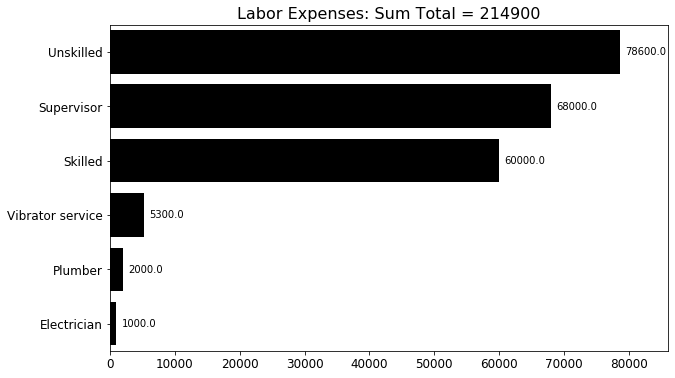

In [55]:
plt.figure(figsize=(10,6))
plt.xlim(0,86000)
g=sns.barplot(x='Total',y='Name', data=labor_grps, order=labor_grps.sort_values('Total',ascending=False).Name, color='black')
for p in g.patches:
    g.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.ylabel('')
plt.xticks(size = 12)
plt.yticks(size=12)
plt.xlabel("")
plt.title('Labor Expenses'+": Sum Total = "+str(labor_grps['Total'].sum()),size=16)
plt.show()

#### Tools Expenses

In [56]:
tools_exp = expenses[expenses['Category'] == 'Tools']
tools_exp.head(3)

,Date,Name,Category,Unit Price,Quantity,Total,Week
5,2020-09-29,Spades,Tools,300,3,900,week1
6,2020-09-29,Hose pipe,Tools,800,1,800,week1
7,2020-09-29,Drum,Tools,2200,1,2200,week1


##### Some tools are worded differently but refer to the same thing. This is an error during data entry. The following lines of code standardize the names.

In [57]:
#Replace some names for generalization
tools_exp['Name'] = tools_exp['Name'].replace(['Cutting disc'],'Cutting disk')
tools_exp['Name'] = tools_exp['Name'].replace(['Wheelbarrow repair 1'],'Wheelbarrow repairs')
tools_exp['Name'] = tools_exp['Name'].replace(['Wheelbarrow repairs 3'],'Wheelbarrow repairs')
tools_exp['Name'] = tools_exp['Name'].replace(['Pump fittings'],'Pump')

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [58]:
tools_grps = tools_exp.groupby('Name')['Total'].sum().reset_index()
tools_grps.head(3)

,Name,Total
0,Air cleaner,1500
1,Bosch drill,5692
2,Crowbar,800


##### A bar plot of expenses per different tools 

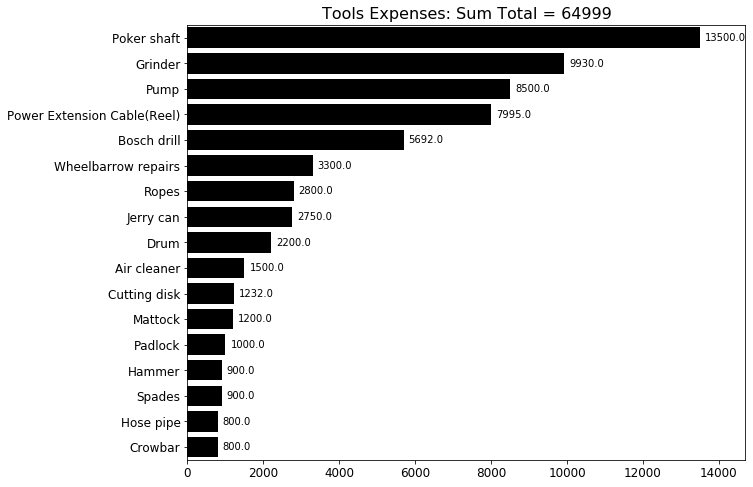

In [59]:
plt.figure(figsize=(10,8))
plt.xlim(0,14700)
g=sns.barplot(x='Total',y='Name', data=tools_grps, order=tools_grps.sort_values('Total',ascending=False).Name, color='black')
for p in g.patches:
    g.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.ylabel('')
plt.xticks(size = 12)
plt.yticks(size=12)
plt.xlabel("")
plt.title('Tools Expenses'+": Sum Total = "+str(tools_grps['Total'].sum()), size=16)
plt.show()

#### Materials expenses

In [60]:
mat_exps = expenses[expenses['Category'] == 'Materials']
mat_exps.head(3)

,Date,Name,Category,Unit Price,Quantity,Total,Week
1,2020-09-28,Sand 18 Tonnes,Materials,25000,2,50000,week1
2,2020-09-28,Ballast 17 Tonnes,Materials,30000,3,90000,week1
3,2020-09-29,Poles 30 pcs,Materials,4000,1,4000,week1


##### A data entry error led to some materials given different names yet refer to the same material. The following lines of code standardize these names

In [61]:
#Replace some names for generalization
mat_exps['Name'] = mat_exps['Name'].replace(['Binding wire roll'],'Binding wire')
mat_exps['Name'] = mat_exps['Name'].replace(['Nails kg','Nails kgs','Nails roofing','Nails 3" 25kg','Nails 4" 25kg'],'Nails')
mat_exps['Name'] = mat_exps['Name'].replace(['Cut stones'],'Stones')
mat_exps['Name'] = mat_exps['Name'].replace(['metal D 10','metal D 16','metal D 20','metal D 8','Metal D10','Metal D16','Metal D20','Metal D8'],'Metal')
mat_exps['Name'] = mat_exps['Name'].replace(['Ballast 17 Tonnes'],'Ballast')
mat_exps['Name'] = mat_exps['Name'].replace(['Timber 1" 3500 2" 300','Timber 6*1=2000ft 4*2=1000ft'],'Timber')
mat_exps['Name'] = mat_exps['Name'].replace(['Sand 18 Tonnes','Sand 18T Yellow'],'Sand')
mat_exps['Name'] = mat_exps['Name'].replace(['Poles 30 pcs'],'Poles')

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [62]:
mat_grps = mat_exps.groupby('Name')['Total'].sum().reset_index()
mat_grps

,Name,Total
0,4way,90
1,Ballast,90000
2,Binding wire,13300
3,Blade,6000
4,Bucket,1150
5,Cement,140500
6,Cobras,100
7,Conduit 20mm,550
8,Couples,80
9,Cutting disc,800


###### A bar plot of expenses by material type

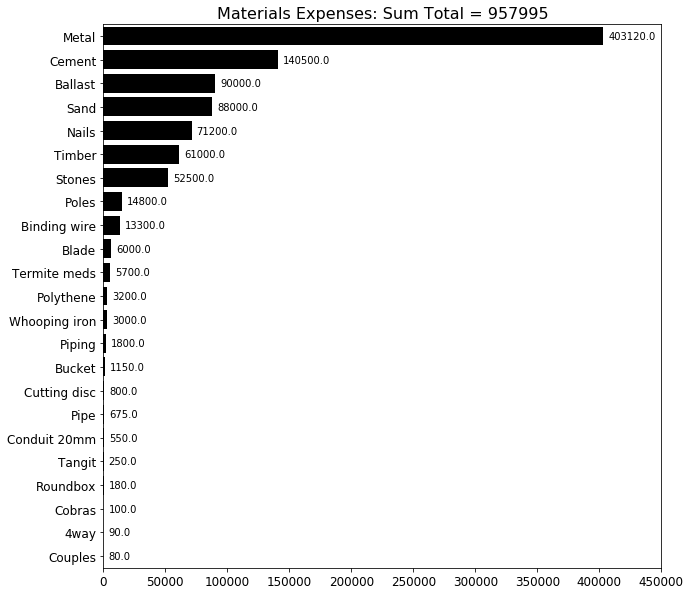

In [64]:
plt.figure(figsize=(10,10))
plt.xlim(0,450000)
g=sns.barplot(x='Total',y='Name', data=mat_grps, order=mat_grps.sort_values('Total',ascending=False).Name,color='black')
for p in g.patches:
    g.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.ylabel('')
plt.xlabel('')
plt.xticks(size = 12)
plt.yticks(size=12)
plt.title('Materials Expenses'+": Sum Total = "+str(mat_grps['Total'].sum()), size=16)
plt.show()

### Expenses with cumsum (for printing)

In addition to the visual analysis, the project manager requires a printout of all the expenses, sorted by 'Category' then expense 'Name'. There will also be a cummulative total column for the totals.

In [42]:
expenses_cumsum = expenses.copy()

In [43]:
expenses_cumsum = expenses_cumsum.sort_values(['Category','Name'])

In [44]:
expenses_cumsum['cumsum'] = expenses_cumsum['Total'].cumsum()

In [49]:
expenses_cumsum.head()

,index,Date,Name,Category,Unit Price,Quantity,Total,Week,cumsum
50,58,2020-10-13,Blue prints printing/ rider,Approvals,1500,1,1500,week3,1500
49,59,2020-10-13,Nema/ncs consultant,Approvals,40000,1,40000,week3,41500
95,7,2020-11-06,Fuel KBJ 625E,Fuel,1000,1,1000,week6,42500
81,23,2020-10-30,Fuel KBU 717u,Fuel,1000,1,1000,week5,43500
37,71,2020-10-07,KBU fuel,Fuel,1000,1,1000,week2,44500


In [47]:
expenses_cumsum1 = expenses_cumsum.drop('index', axis=1)

In [48]:
expenses_cumsum1

,Date,Name,Category,Unit Price,Quantity,Total,Week,cumsum
50,2020-10-13,Blue prints printing/ rider,Approvals,1500,1,1500,week3,1500
49,2020-10-13,Nema/ncs consultant,Approvals,40000,1,40000,week3,41500
95,2020-11-06,Fuel KBJ 625E,Fuel,1000,1,1000,week6,42500
81,2020-10-30,Fuel KBU 717u,Fuel,1000,1,1000,week5,43500
37,2020-10-07,KBU fuel,Fuel,1000,1,1000,week2,44500
...,...,...,...,...,...,...,...,...
67,2020-10-23,Pump fittings,Tools,2500,1,2500,week4,1301734
70,2020-10-23,Ropes,Tools,80,35,2800,week4,1304534
5,2020-09-29,Spades,Tools,300,3,900,week1,1305434
71,2020-10-23,Wheelbarrow repair 1,Tools,1700,1,1700,week4,1307134


In [50]:
expenses_cumsum1.to_csv('expenses_cumsum.csv', index = False)